## Telco Customer Churn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

Load the data to be used

In [4]:
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data Preprocessing

In [155]:
#Look for missing values
nan_df=telco[telco.isna().any(axis=1)]
nan_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


1. Demographic:

a. Which 2 demographics have proven to be the most popular with the telco brand?

Ans: Young generation i.e. those who are not senior citizens and those who do not have dependants.

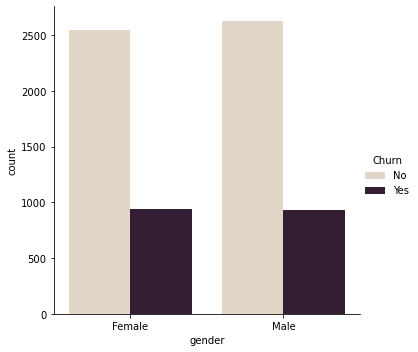

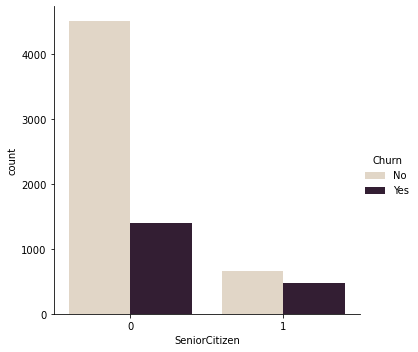

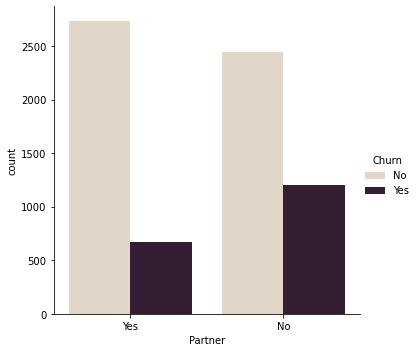

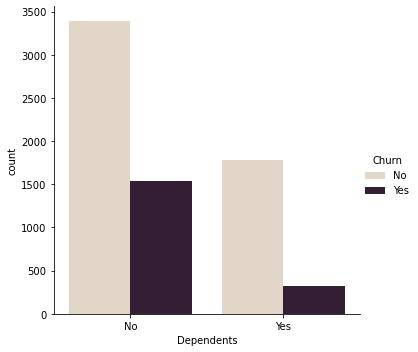

In [200]:
demographics = telco[['gender', 'SeniorCitizen', 'Partner', 'Dependents']]

for i in demographics:
    sns.catplot(x=i, hue='Churn', kind="count", palette="ch:.25", data=telco)

b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

Ans: To the senior citizens

2. Services

a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

Ans:Phone Service, having multiple lines and Internet service

In [15]:
services = telco[['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
       'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MonthlyCharges','Churn']]

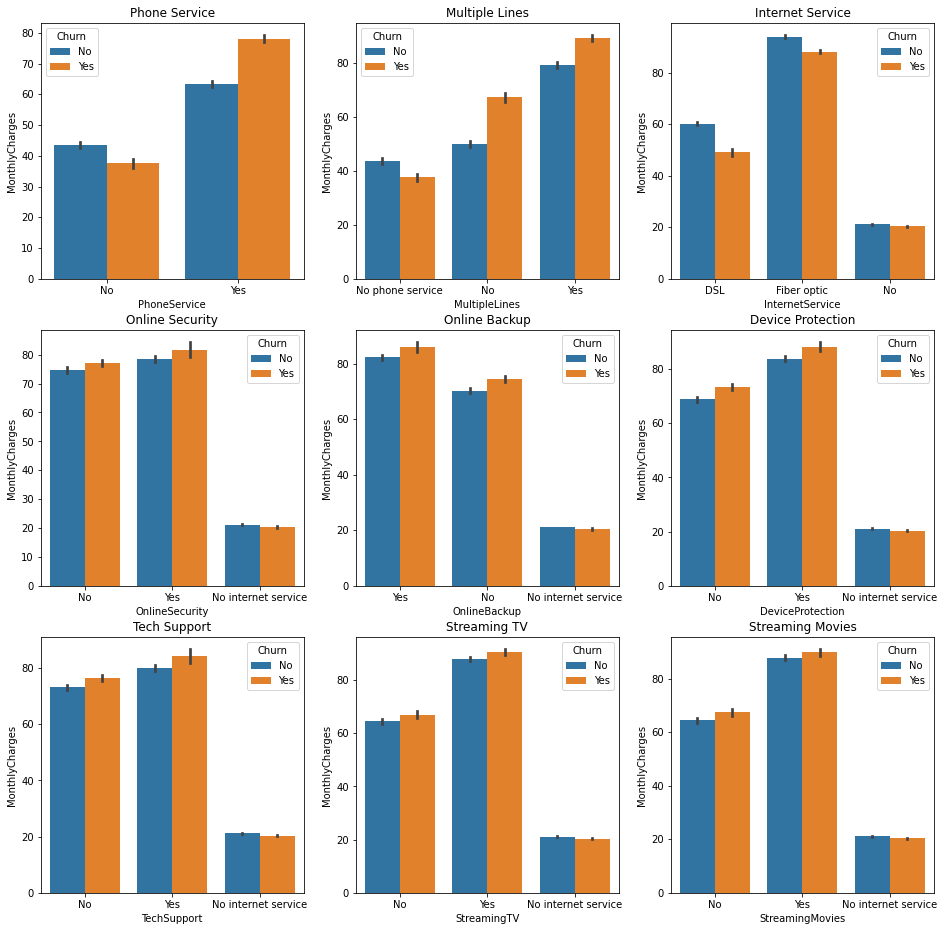

In [322]:
#plt.figure(figsize=(5,3))
fig,a =  plt.subplots(3,3,figsize=(16,16))
sns.barplot(ax=a[0, 0], x='PhoneService', y='MonthlyCharges', hue='Churn', data=services);
a[0,0].set_title("Phone Service");
sns.barplot(ax=a[0, 1], x='MultipleLines', y='MonthlyCharges', hue='Churn', data=services);
a[0,1].set_title("Multiple Lines");
sns.barplot(ax=a[0, 2], x='InternetService', y='MonthlyCharges', hue='Churn', data=services);
a[0,2].set_title("Internet Service");
sns.barplot(ax=a[1, 0], x='OnlineSecurity', y='MonthlyCharges', hue='Churn', data=services);
a[1,0].set_title("Online Security");
sns.barplot(ax=a[1, 1], x='OnlineBackup', y='MonthlyCharges', hue='Churn', data=services);
a[1,1].set_title("Online Backup");
sns.barplot(ax=a[1, 2], x='DeviceProtection', y='MonthlyCharges', hue='Churn', data=services);
a[1,2].set_title("Device Protection");
sns.barplot(ax=a[2, 0], x='TechSupport', y='MonthlyCharges', hue='Churn', data=services);
a[2,0].set_title("Tech Support");
sns.barplot(ax=a[2, 1], x='StreamingTV', y='MonthlyCharges', hue='Churn', data=services);
a[2,1].set_title("Streaming TV");
sns.barplot(ax=a[2, 2], x='StreamingMovies', y='MonthlyCharges', hue='Churn', data=services);
a[2,2].set_title("Streaming Movies");
plt.show()

b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

Ans: Two year type of contract since of those who took it, most of them were retained, roughly about 97% retention rate

In [386]:
phone = telco[['PhoneService','Contract', 'Churn']][telco['PhoneService'] == 'Yes']
counts = phone.groupby(['Contract','Churn']).count()
counts

PhoneService
Contract       Churn              
Month-to-month No             1997
               Yes            1502
One year       No             1176
               Yes             152
Two year       No             1489
               Yes              45

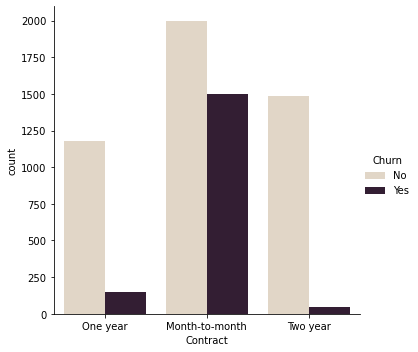

In [331]:
sns.catplot(x="Contract", hue='Churn', kind="count", palette="ch:.25", data=phone);

3. Payment: (Use visualizations in explaining your analysis)

a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
    i. Basic
    ii. Plus
    iii. Premium

In [16]:
services

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
0,No,No phone service,DSL,No,Yes,No,No,No,No,29.85,No
1,Yes,No,DSL,Yes,No,Yes,No,No,No,56.95,No
2,Yes,No,DSL,Yes,Yes,No,No,No,No,53.85,Yes
3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,42.30,No
4,Yes,No,Fiber optic,No,No,No,No,No,No,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,84.80,No
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.20,No
7040,No,No phone service,DSL,Yes,No,No,No,No,No,29.60,No
7041,Yes,Yes,Fiber optic,No,No,No,No,No,No,74.40,Yes


b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

Ans: No, since with paperless billing there is a high churn rate.

In [10]:
bill = telco[['PaperlessBilling','MonthlyCharges', 'Churn']]
bill.groupby(['PaperlessBilling','Churn']).sum()

MonthlyCharges
PaperlessBilling Churn                
No               No          119702.95
                 Yes          29620.85
Yes              No          197282.80
                 Yes         109510.00

In [20]:
sns.catplot(x="PaperlessBilling",y="MonthlyCharges", hue='Churn', kind="bar", palette="Set4", data=bill);

ValueError: Set4 is not a valid palette name